<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamin Hernth
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/morbul/MDS7202_entregas`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [162]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [106]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


Tenemos un dataset de retail donde encontramos columnas                                                                                                   
Invoice, StockCode, Costumer ID: tipo category los cuales representan el numero de orden, el codigo de producto y el codigo de cliente.                   
Description, Country: son variables tipo objeto, es texto que indica la descripción del producto y el país de la compra                                   
Quantity(int): cantidad comprada                                                                                                                          
InvoiceDate(datetime): fecha de la compra                                                                                                                 
Price($): precio de la compra  

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí

Univariable: analizar las variables por si solas, como distribuyen, sus frecuencias, medidas de tendencia central, dispersión, graficos de caja.

Multivariable: graficos de dispersión, correlación, coordenadas paralelas, tablas de contigencia, scatterplot, violín. Se analizan relaciones entre var.

Datos faltantes: ver que columnas tienen datos faltantes, esto puede llevar a imputación o eliminacion de observaciones.                                  
Los beneficios de estudiar estos datos, son poder entender el dataset e identificar cuales seran varibles de interes al momento de realizar 'feature      enginnering'

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [107]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 4)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
        serie.value_counts()[0:39]
        .reset_index()
        .rename(columns={'index': 'Category', serie.name: 'Count'})
    )
        fig = px.bar(
        x=count['Category'].astype(str),
        y=count['Count'],
        title=f"All Categories of {serie.name}"
    )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [108]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                   0.0006 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

> Analisis PRICE

Precio de tipo float, esto estaria mal dependiendo del tipo de moneda con la cual estemos trabajando, pero como es una tienda europea se aceptando los centavos de libras o moneda que se este usando.

Mean: 4.6 con una desviacion estandar elevada de 126, lo cual nos podria conducir a pensar en outliers, esto se confirma con que el 75% de los datos aun se encuentra bajo un valor de 5 y la kurtosis muy alta.

Poca presencia de valores negativos 0.0006 % pero hay una presencia notable de valores zero 0.7 %, no es tan alta por lo que se podrian imputar.

Por ultimo encontramo 0.19% de valores duplicados, pero estamos analizando precios por lo que podrian ser compras de un mismo item o que simplemente
valgan lo mismo por lo que no es algo de lo que haya que preocuparse.


Invoice	StockCode	Description	Quantity	InvoiceDate	Price	Customer ID	Country

In [109]:
profile_serie(df_retail["Country"])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

> Analisis Country

Tipo objeto, deberia ser tratado como categoria

No tenemos celdas faltantes, pero si una gran cantidad de duplicados. Pero esto se debe a que el local se debe encontrar en "United Kingdom".


In [110]:
profile_serie(df_retail["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

> Analisis Customer ID

De tipo category, nos indica la persona que realizo la compra, tenemos 4383 clientes distintos.

En esta columna si encontramos una gran cantidad de datos faltantes que deben ser analisis. 

Los datos duplicados no son relevantes ya que serian una nueva compra por parte de un cliente.

In [111]:
profile_serie(df_retail["InvoiceDate"])

c:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 525461
Unique                                  25296
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         520400
Duplicate rows (%)                    99.04 %
Total size in memory            4203816 bytes
dtype: object

> Analisis InvoiceDate

No se evidencia outliers en el boxplot.

Gran cantidad de duplicados, pero se debe a comprar realizadas en un mismo dia.

Tenemos datos de 1 año de ventas 2009-12 a 2010-12

In [112]:
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                   2.3457 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

> Analisis Quantity

Promedio de cantidad vendida de 10.33 el 75% de los datos estan bajo los 10, tenemos outliers de gran tamaño. Pero dado que son ventas de
retail, no considero que sean errores que deben ser limpiados.

Por otro lado hay cantidades negativas a eliminar.

Curtosis positiva y Skew muy alto, lo cual se ve en la grafica datos cargados hacia la izquierda muy concentrados.


In [113]:
profile_serie(df_retail["StockCode"])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

> Analisis StockCode

Variable categorica, no tenemos celdas vacias. 

Gran cantidad de duplicados, pero se explica debido a que son los productos del retail.

Hay 4632 productos distintos que se han vendido

In [114]:
profile_serie(df_retail["Description"])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

> Analisis Description

Columna de tipo objeto, son las descripciones de la columna analizada anteriormente.

No presenta anomalias, solo indicar que tenemos productos o observaciones sin descripción por lo que se registran como nan.


In [115]:
profile_serie(df_retail["Invoice"])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

> Analisis Invoice

De tipo categorica, la entiendo como cada compra realizada en el retail.

Tenemos entonces 28.816 compras realizadas en la base de datos.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [116]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

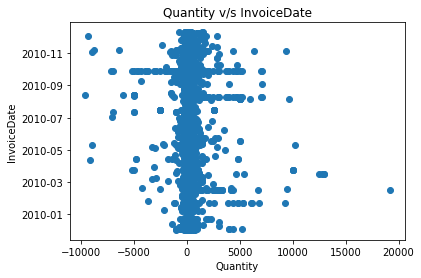

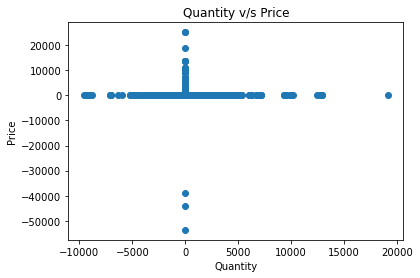

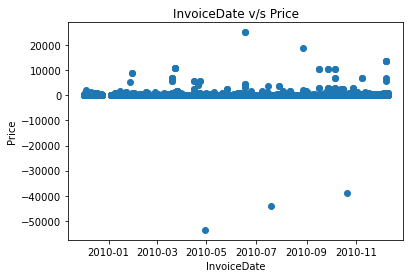

## Correlation:

## Missing Matrix:

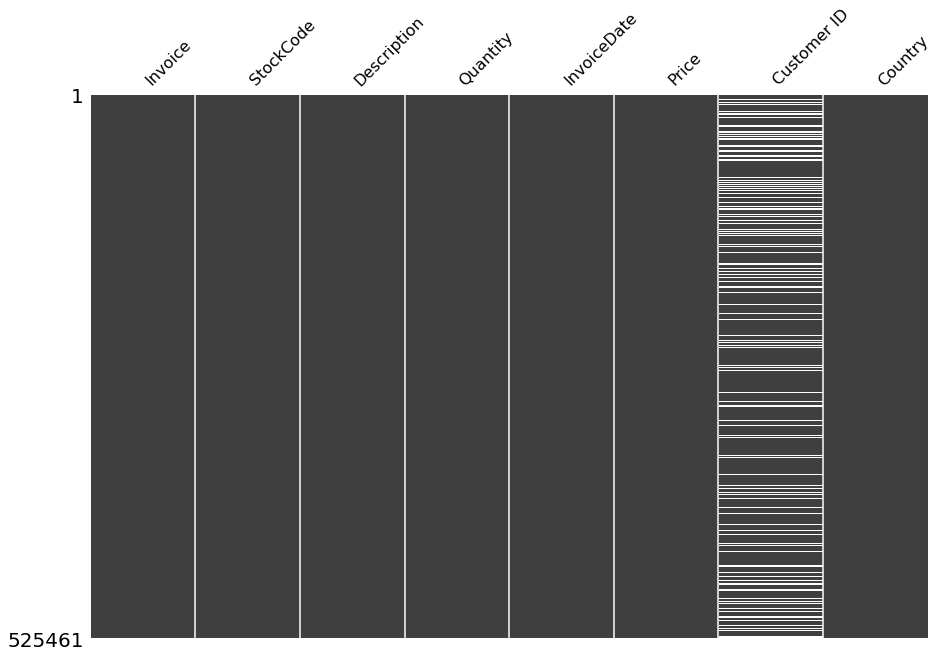

In [117]:
profile_df(df_retail)

>Quantity vs InvoiceDate

Podemos apreciar que no hay mayores anomalias en las cantidades vendidas por fecha, pero si identificamos cantidades negativas que deben ser 
analizadas.

>Quantity vs Price

Igual que el grafico anterior se identifican cantidades negativos, pero también vemos precios negativos. La mayor cantidad de los productos vendidos son de precios cercanos al eje x del grafico lo que hace sentido por el promedio de precios visto anteriormente.

>InvoiceDate vs Price

No se extrae información relevante de este, se ve un grafico distribuido a traves de los meses.

>Matriz correlación

Lo visto anteriormente de que esta bien distribuido se confirma al no ver nada de correlación entre cantidades y precio.

>Missing Matrix
 
 La unica columna con valores faltantes es el Customer ID pero no creo que deba ser tratada, dado que no podemos asociar ventas a un cliente
 si no se registro su ID, y eliminar los valores nulos provocaria una mala estimación de ventas del retail



### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [102]:
numeric_columns = ['Quantity', 'Price']
cat_columns = ['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country']
ordinal_columns = ['InvoiceDate']

def clean(dataframe):
    # Convertir columnas numéricas a tipo numérico
    dataframe[numeric_columns] = dataframe[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Convertir columnas categóricas a tipo categoría
    dataframe[cat_columns] = dataframe[cat_columns].astype('category')
    
    # Eliminar filas con valores no válidos en las columnas numéricas
    dataframe.drop(dataframe[dataframe['Price'] <= 0].index, inplace=True)
    dataframe.drop(dataframe[dataframe['Quantity'] <= 0].index, inplace=True)
    
    # Reemplazar 'nan' por NaN en todas las columnas
    dataframe.replace("nan", np.nan, inplace=True)
    
    return dataframe

df_retail_clean = clean(df_retail.copy())

    

In [152]:
profile_serie(df_retail_clean['Price'])

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

In [153]:
profile_serie(df_retail_clean["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

In [154]:
profile_serie(df_retail_clean["InvoiceDate"])

c:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 511566
Unique                                  19468
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         509777
Duplicate rows (%)                    99.65 %
Total size in memory            8185056 bytes
dtype: object

In [155]:
profile_serie(df_retail_clean["Customer ID"])

## Customer ID Profile

Type                           category
Number of observations         407664.0
Unique                           4312.0
Top                             14911.0
Freq                             5570.0
                                       
Missing cells                    103902
Missing cells (%)               20.31 %
Duplicate rows                   511475
Duplicate rows (%)              99.98 %
Total size in memory      5282860 bytes
dtype: object

In [156]:
profile_serie(df_retail_clean["StockCode"])

## StockCode Profile

Type                           category
Number of observations           511566
Unique                             4251
Top                              85123A
Freq                               3421
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511395
Duplicate rows (%)              99.97 %
Total size in memory      5284852 bytes
dtype: object

In [157]:
profile_serie(df_retail_clean["Description"])

## Description Profile

Type                                                category
Number of observations                                511566
Unique                                                  4534
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3455
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        511389
Duplicate rows (%)                                   99.97 %
Total size in memory                           5285244 bytes
dtype: object

In [158]:
profile_serie(df_retail_clean["Invoice"])

## Invoice Profile

Type                           category
Number of observations           511566
Unique                            20952
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509446
Duplicate rows (%)              99.59 %
Total size in memory      6402996 bytes
dtype: object

In [159]:
profile_serie(df_retail_clean["Country"])

## Country Profile

Type                            category
Number of observations            511566
Unique                                40
Top                       United Kingdom
Freq                              473379
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    511566
Duplicate rows (%)               100.0 %
Total size in memory       4605486 bytes
dtype: object

In [174]:
nan_descriptions = df_retail[df_retail['Description'] == 'nan']
nan_descriptions.head()
profile_serie(nan_descriptions["Price"])

## Price Profile

Type                          float64
Number of observations         2928.0
Mean                              0.0
Std                               0.0
Min                               0.0
25%                               0.0
50%                               0.0
75%                               0.0
Max                               0.0
Negative                            0
Negative (%)                    0.0 %
Zeros                            2928
Zeros (%)                     100.0 %
Kurt                                0
Skew                                0
                                     
Missing cells                       0
Missing cells (%)               0.0 %
Duplicate rows                   2928
Duplicate rows (%)            100.0 %
Total size in memory      46848 bytes
dtype: object

## Bivariant Analysis:

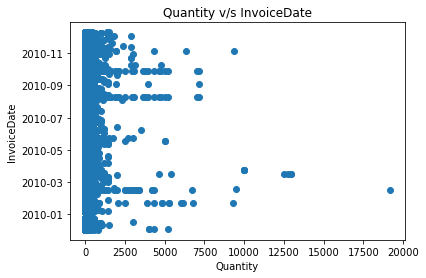

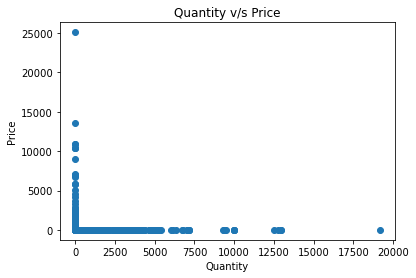

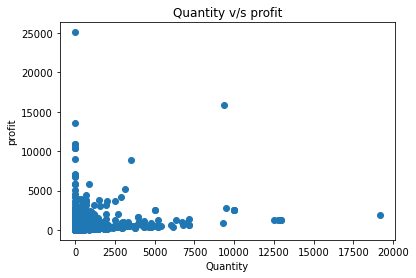

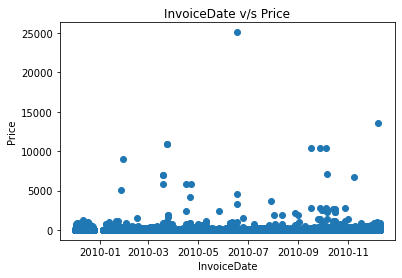

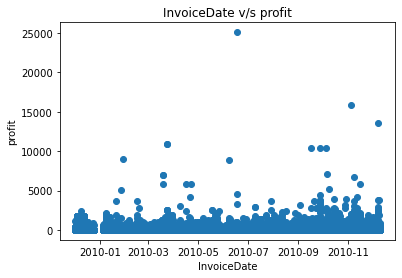

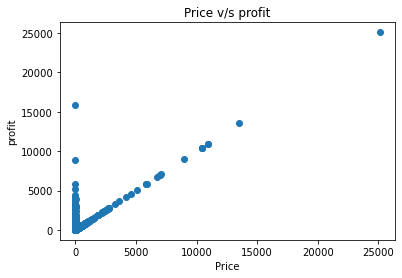

## Correlation:

## Missing Matrix:

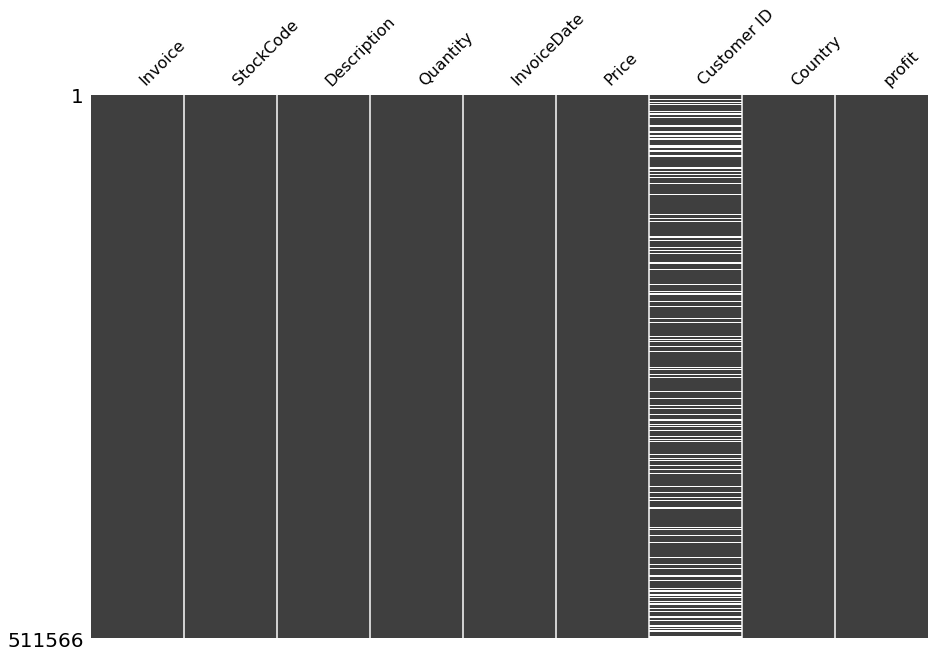

In [175]:
profile_df(df_retail_clean)

> Revisión EDA dataset limpio

Se aprecia una mejoria en los graficos de dispersión.

Se eliminaron las observaciones que no tenian sentido como precios o cantidades negativas.

Se identifica que todo los productos con descripciones 'nan' eran productos de precio 0, por lo que fueron borrados del dataset

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [121]:
df_retail_clean["profit"] = df_retail_clean["Price"] * df_retail_clean["Quantity"]  # profit = ganancia


In [122]:
df_retail_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,profit
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [123]:
aggregations = {
    'profit': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',
}

df_rank_ventas = df_retail_clean.groupby("StockCode").agg(aggregations).sort_values(ascending=False, by="profit")

In [ ]:
df_rank_ventas.reset_index(inplace=True)

In [136]:
df_rank_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   level_0    4632 non-null   int64   
 1   index      4632 non-null   int64   
 2   StockCode  4632 non-null   category
 3   profit     4632 non-null   float64 
 4   Quantity   4632 non-null   int64   
 5   Price      4251 non-null   float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 355.3 KB


In [179]:
# Obtener los primeros 30 items y sus profits
#top_item = df_rank_ventas['StockCode'].head(30)
#top_venta = df_rank_ventas['profit'].head(30)

#plt.figure(figsize=(12, 6))
#plt.bar(top_item, top_venta)
#plt.xlabel('Item')
#plt.ylabel('Profit')
#plt.title('Top 30 Items por Profit')
#plt.xticks(rotation=90)
#plt.show()
top_item = df_rank_ventas['StockCode'].head(30).astype(str)
top_profit = df_rank_ventas['profit'].head(30)
top_quantity = df_rank_ventas['Quantity'].head(30)

data = pd.DataFrame({'StockCode': top_item, 'Profit': top_profit, 'Quantity': top_quantity})
fig = px.bar(data, x='StockCode', y=['Profit', 'Quantity'], barmode='group',
             labels={'StockCode': 'Item', 'value': 'Profit'}, title='Top 30 Items: Profit vs Price-Quantity')

fig.update_layout(xaxis={'tickangle': 90})
fig.show()



> Comentarios

Se aprecia en el grafico los 30 productos más vendidos, hay algunos SKU que no hacen sentido como DOT y M.

Por otro lado vemos que no existe una relación notable entre la cantidad vendida y el ingreso generado por estos productos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [150]:
def plot_ventas(dataframe):
    ventas_dia = dataframe.groupby('InvoiceDate').agg({'profit': 'sum'})
    plot_ventas = px.line(ventas_dia, title='Ventas por día')
    plot_ventas.show()
    pass

In [151]:
plot_ventas(df_retail_clean)

>Comentarios

Tenemos un periodo sin ventas al comienzo del año.

Posterior a eso vemos unas alzas periodicas de ingresos por ventas, estos podrian deberse a momentos donde se venden los productos más
caros que tenemos disponibles en la tienda como DOT pero esto requiere un proximo analisis para confirmar que pasa con lo que se muestra.




# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>